# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In [75]:
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
from scipy.stats import binom
import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
from scipy.stats import norm
import pandas as pd
df = pd.read_csv("vehicles.csv",encoding = "ISO-8859-1") #To load the data csv
from scipy.stats import expon

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [2]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.81124496 2.9291246  2.57927781 2.49081766 2.65209941 2.3029805
 2.85447166 2.25508627 2.40415384 2.02467219]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [28]:
# your code here
def melocotonero (a,b,c):
    x = uniform.rvs(size=c)
    melocotones  = a + (b-a)*x
    return(melocotones)
    

In [42]:
a1 = melocotonero(10,15,100)

In [43]:
a2 = melocotonero(10,60,1000)

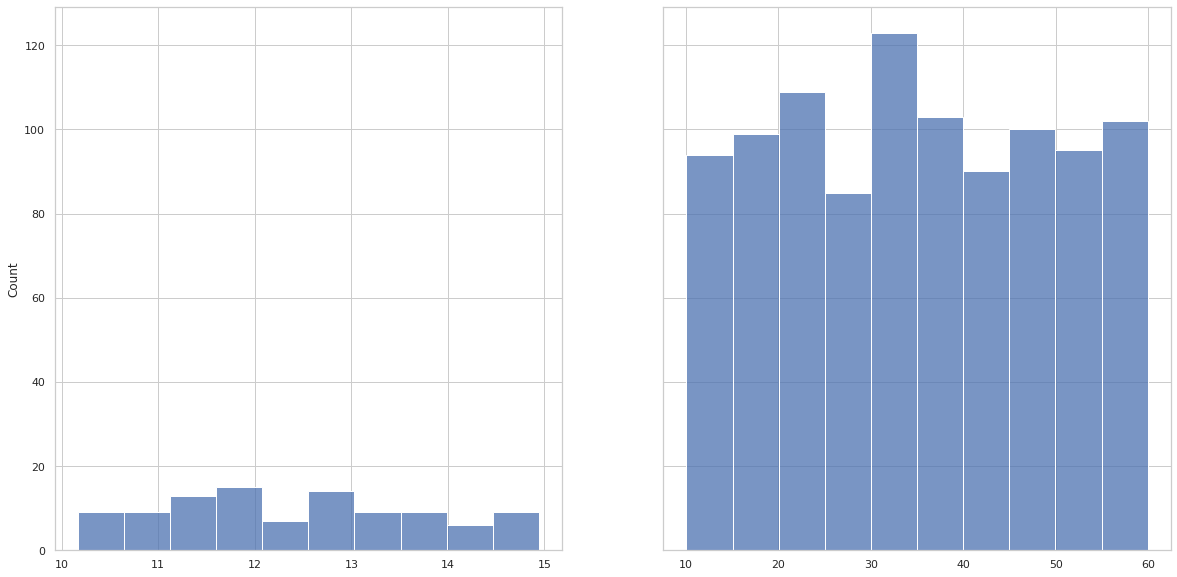

In [44]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10),sharey=True)
sns.histplot(a1,ax=axs[0],bins=10)
sns.histplot(a2,ax=axs[1],bins=10);

How are the two distributions different?

In [45]:
# your answer below
'''
The main difference between the two distributions is that the second one 
has ten times the number of results than the first one.
The results are much more relaible as the dataset increases in values.
'''


'\nThe main difference between the two distributions is that the second one \nhas ten times the number of results than the first one.\nThe results are much more relaible as the dataset increases in values.\n'

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [54]:
# your code here
def distribucionnormal (a,b,c):
    ndt1 = norm(loc=a, scale=b)
    b1 = ndt1.rvs(size=c)
    return b1

In [58]:
c1 = distribucionnormal(10,1,1000)

In [59]:
c2 = distribucionnormal(10,50,1000)

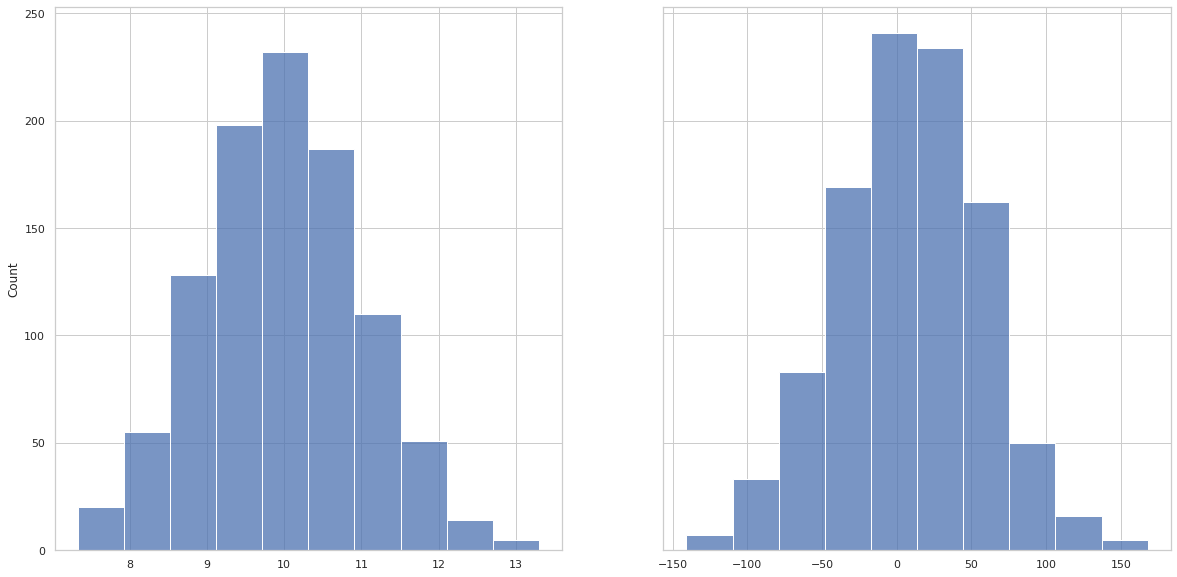

In [60]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10),sharey=True)
sns.histplot(c1,ax=axs[0],bins=10)
sns.histplot(c2,ax=axs[1],bins=10);

How are the two distributions different?

In [61]:
# your answer below
'''
As the second plot has a standard deviation of 50, the results from this array are more divergent
than the ones from the first array which stf is equal to 1.
'''

'\nAs the second plot has a standard deviation of 50, the results from this array are more divergent\nthan the ones from the first array which stf is equal to 1.\n'

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

In [67]:
df.rename(columns={"Fuel Barrels/Year":"FuelBarrels/Year","CO2 Emission Grams/Mile":"CO2EmissionGram/Mile","Combined MPG":"CombinedMPG"},inplace=True)
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,FuelBarrels/Year,City MPG,Highway MPG,CombinedMPG,CO2EmissionGram/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year
2. CO2 Emission Grams/Mile
3. Combined MPG

<AxesSubplot:xlabel='CombinedMPG', ylabel='Count'>

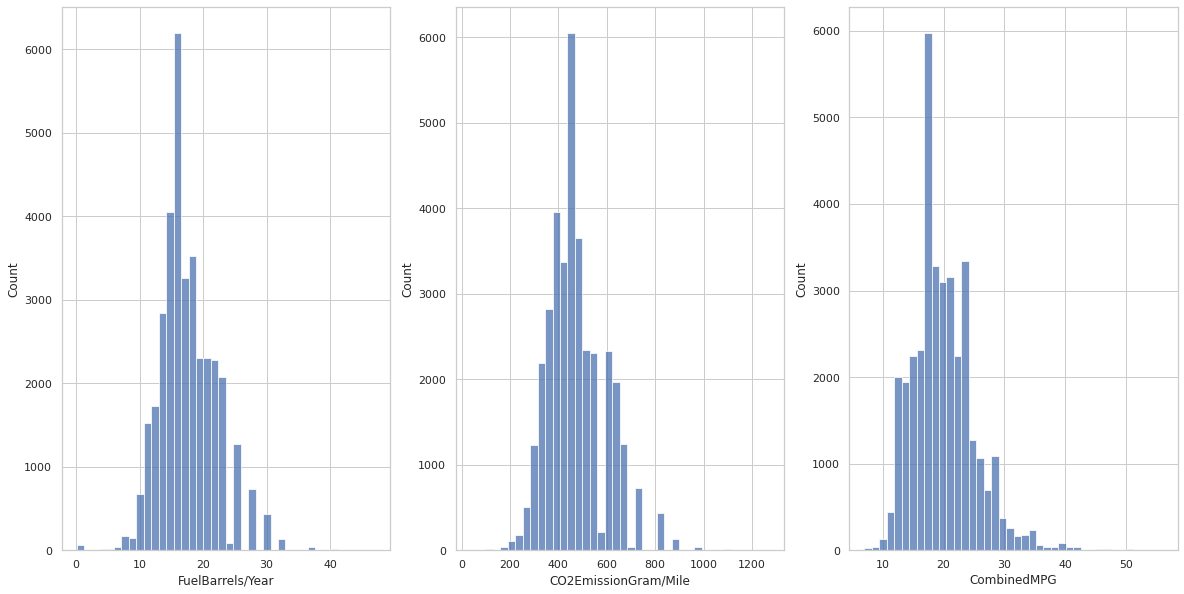

In [73]:
# your code here
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
sns.histplot(data=df, x= "FuelBarrels/Year",ax=axs[0],bins=40)
sns.histplot(data=df, x="CO2EmissionGram/Mile",ax=axs[1],bins=40)
sns.histplot(data=df, x="CombinedMPG",ax=axs[2],bins=40)

Which one(s) of the variables are nearly normally distributed? How do you know?

# your answer here
'''
The three of the graphs may look like they follow a Normal Distribution at first, 
but if we look further into the data expanding the number of bins we can see as this distribution is not followed.
'''

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 10 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [89]:
# your code here
def distribucionexponencial (a,b):
    edt = expon(scale=a)
    d1 = edt.rvs(size=b)
    return d1

In [96]:
f1 = distribucionexponencial(10,10)

In [98]:
f2 = distribucionexponencial(10,100)

<AxesSubplot:ylabel='Count'>

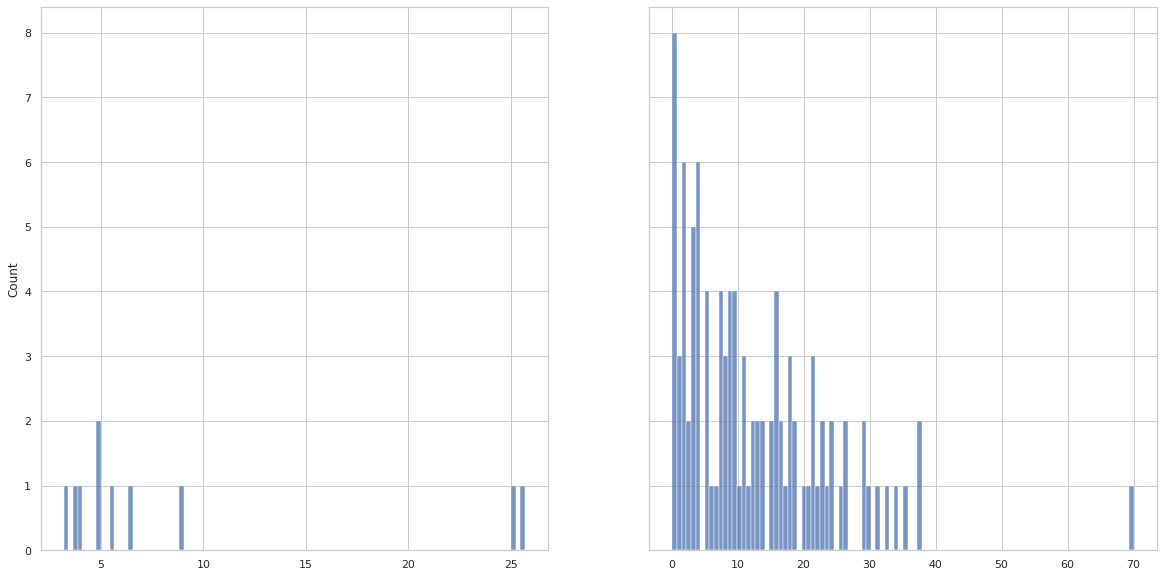

In [100]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,10),sharey=True)
sns.histplot(f1,ax=axs[0],bins=100)
sns.histplot(f2,ax=axs[1],bins=100)

How are the two distributions different?

# your answer here
'''
No entiendo muy bien lo que tenemos que explicar aquí, veo la diferencia en el volumen de la muestra y que 
en la segunda gráfica la distribución exponencial es más clara.
'''

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [101]:
# your answer here
# Hint: This is same as saying P(x<15)
my_e = expon(scale=10)
z = my_e.cdf(15)
z

0.7768698398515702

What is the probability that the customer will spend more than 15 minutes

In [ ]:
# your answer here

In [102]:
1-z

0.2231301601484298